In [1]:
# import libs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# **1. Summary of Dataset**

In [2]:
df_23 = pd.read_csv('./archive/male_players_23.csv')
df_23.info()

/var/folders/04/vvvt38vs7wz3j6wh3b78439h0000gn/T/ipykernel_17595/367792310.py:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  df_23 = pd.read_csv('./archive/male_players_23.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10003590 entries, 0 to 10003589
Columns: 110 entries, player_id to player_face_url
dtypes: float64(18), int64(45), object(47)
memory usage: 8.2+ GB


In [3]:
df_23.head(5)

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/230009,23,9,2023-01-13,L. Messi,Lionel Andrés Messi Cuccittini,RW,91,91,...,63+3,63+3,64+3,59+3,50+3,50+3,50+3,59+3,19+3,https://cdn.sofifa.net/players/158/023/23_120.png
1,165153,/player/165153/karim-benzema/230009,23,9,2023-01-13,K. Benzema,Karim Benzema,"CF, ST",91,91,...,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3,https://cdn.sofifa.net/players/165/153/23_120.png
2,188545,/player/188545/robert-lewandowski/230009,23,9,2023-01-13,R. Lewandowski,Robert Lewandowski,ST,91,91,...,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/23_120.png
3,192985,/player/192985/kevin-de-bruyne/230009,23,9,2023-01-13,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,79+3,79+3,78+3,74+3,68+3,68+3,68+3,74+3,21+3,https://cdn.sofifa.net/players/192/985/23_120.png
4,231747,/player/231747/kylian-mbappe/230009,23,9,2023-01-13,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,...,63+3,63+3,67+3,63+3,54+3,54+3,54+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/23_120.png


* There are 10,003,590 entries with 110 columns.
--------

## Data Wrangling

### Data cleaning

In [4]:
#drop player_id duplicates
df_23.drop_duplicates(subset=['player_id'],inplace=True)

In [35]:
#save the reduced dataset for later usage
df_23.to_csv('male_23_reduced.csv')

In [5]:
df_23.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56880 entries, 0 to 10003531
Columns: 110 entries, player_id to player_face_url
dtypes: float64(18), int64(45), object(47)
memory usage: 48.2+ MB


In [12]:
df_23.columns

Index(['fifa_version', 'fifa_update', 'fifa_update_date', 'short_name',
       'long_name', 'player_positions', 'overall', 'potential', 'value_eur',
       'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'league_name',
       'league_level', 'club_name', 'club_position', 'club_jersey_number',
       'club_loaned_from', 'club_joined_date', 'nationality_name',
       'nation_position', 'nation_jersey_number', 'preferred_foot',
       'weak_foot', 'skill_moves', 'international_reputation', 'work_rate',
       'body_type', 'player_tags', 'player_traits', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balanc

* There are 56,880 players with 110 columns.
-----

In [6]:
#check if the dataset has missing values
df_23.isnull().any().sort_values(ascending=0)

club_jersey_number             True
nation_position                True
club_position                  True
dribbling                      True
club_loaned_from               True
                              ...  
attacking_volleys             False
attacking_short_passing       False
attacking_heading_accuracy    False
attacking_finishing           False
player_face_url               False
Length: 110, dtype: bool

In [7]:
#check which column has the most missing values.
df_23.isnull().sum().sort_values(ascending=0)

nation_jersey_number          55324
nation_team_id                55324
nation_position               55324
club_loaned_from              54881
player_tags                   54287
                              ...  
attacking_volleys                 0
attacking_short_passing           0
attacking_heading_accuracy        0
attacking_finishing               0
player_face_url                   0
Length: 110, dtype: int64

<Axes: >

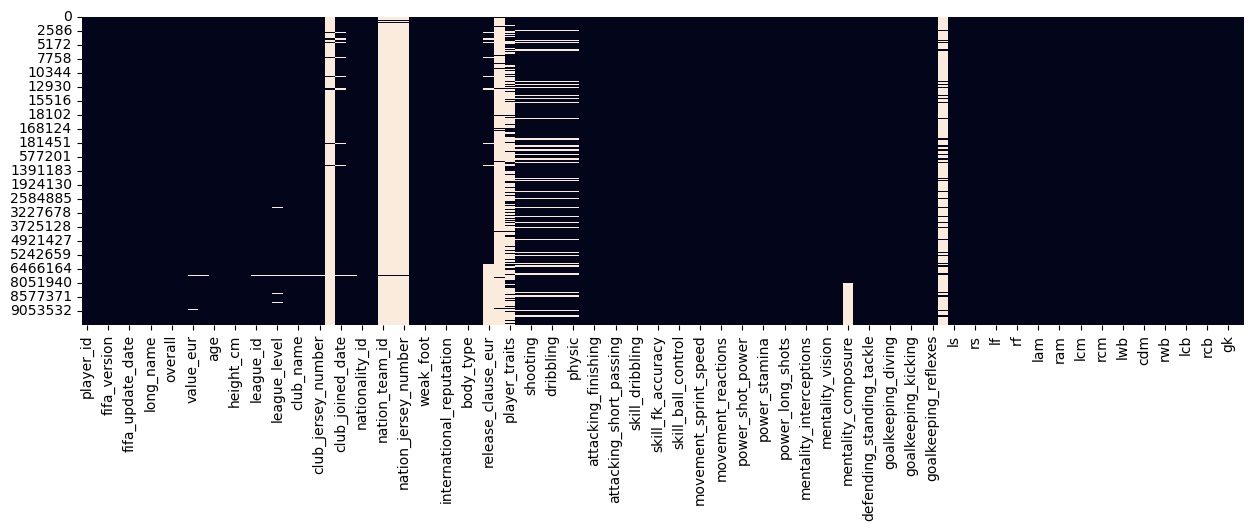

In [8]:
fig, ax = plt.subplots(figsize=(15,4))
sns.heatmap(df_23.isnull(), cbar=False)

* if a column lost all or most its data, it would better we drop it from tables as it doesn't help in any way,as well as the "url" columns.
* We don't need sofifa_id and real_face as they don't make sense for analysing, but we keep club and national team id because they may represent teams and countries (except their most data are missing).
* player_traits is special, we want to check if it is a influencing factor. We set the null as "no traits" for further analysis processing.
* We also don't need the scores of players who are in the wrong positions.

In [9]:
#look into the player traits
df_23['player_traits'].fillna('no traits',inplace=True)

#drop player_id, real_face
df_23.drop(columns=['player_id','real_face'],inplace=True)

#drop columns that we don't need (url,id)
df_23.drop(columns=df_23.filter(regex ='url').columns,inplace=True)
df_23.drop(columns=df_23.filter(regex ='id').columns,inplace=True)

#drop release_clause_eur,mentality_composure,goalkeeping_reflexes
df_23.drop(columns=['release_clause_eur','mentality_composure','goalkeeping_reflexes'],inplace=True)

#drop the columns that lose their most data
df_23.drop(columns=['club_jersey_number','player_tags','goalkeeping_speed','club_loaned_from','nation_jersey_number','nation_position'],inplace=True)

#drop the columns presents the scores of player in the wrong position
df_23.drop(columns=['ls', 'st', 'rs', 'lw','lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm',
    'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb','gk'],
    inplace=True)

#remove DOB as it says the same thing with the Age.
#remove fifa_version,fifa_update,fifa_update_date
df_23.drop(columns=['dob','fifa_version','fifa_update_date','fifa_update','short_name'],inplace=True)

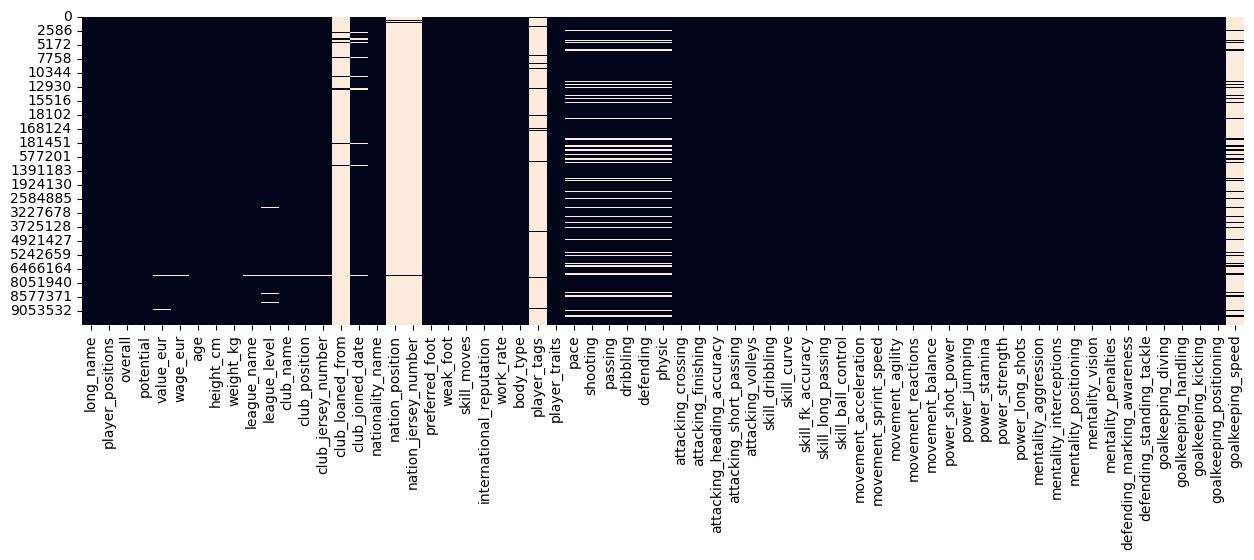

In [17]:
#Let's check the missing value again
fig, ax = plt.subplots(figsize=(15,4))
sns.heatmap(df_23.isnull(), cbar=False)
plt.show()

* There are still columns missing values. Are they related to the player_position?

In [18]:
#List the columns missing values
print(
df_23[df_23['pace'].isna()]['player_positions'].unique(),
df_23[df_23['passing'].isna()]['player_positions'].unique(),
df_23[df_23['defending'].isna()]['player_positions'].unique(),
)

['GK' 'CM' 'ST' 'RW, CAM'] ['GK' 'CM' 'ST' 'RW, CAM'] ['GK' 'CM' 'ST' 'RW, CAM']


* Maybe we should remove goalkeep for analysis as the goalkeeps act differently comparing to the others. 

## Glimpse the dataset before analysis

### UniUnivariate

In [19]:
# check how many types 
df_23.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

#### Numeric Columns

In [20]:
# How many numeric columns
print('There\'re',
df_23.dtypes[df_23.dtypes == 'int64'].count() +
df_23.dtypes[df_23.dtypes == 'float64'].count(),
'numeric columns.'
)

There're 51 numeric columns.


* 52 is a large number that we can't handle without a function for generating infomation automatically.
* Would it be better put them in one figure with subplots? Maybe, let's try.

In [21]:
df_23.describe()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,club_jersey_number,nation_jersey_number,...,mentality_positioning,mentality_vision,mentality_penalties,defending_marking_awareness,defending_standing_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_speed
count,56880.000000,56880.000000,5.591300e+04,56088.000000,56880.000000,56880.000000,56880.000000,55727.000000,56087.000000,1556.000000,...,56880.000000,56880.000000,56880.000000,56880.000000,56880.000000,56880.000000,56880.000000,56880.000000,56880.000000,6464.000000
mean,62.772556,67.968653,1.340890e+06,5405.041185,25.078991,180.892405,74.813537,1.396558,24.066914,12.982648,...,47.815963,50.881065,47.347504,43.554641,45.435795,16.214821,15.979553,15.893776,15.969198,35.603651
std,6.769609,5.863769,4.576862e+06,12665.651630,5.231527,6.754879,6.947225,0.791099,19.234858,7.320171,...,18.664042,13.515029,15.482346,19.658621,20.502347,16.749940,16.101739,15.850983,16.171637,10.637491
min,40.000000,40.000000,1.000000e+03,500.000000,16.000000,149.000000,48.000000,1.000000,1.000000,1.000000,...,2.000000,9.000000,5.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,12.000000
25%,58.000000,64.000000,2.100000e+05,1000.000000,21.000000,176.000000,70.000000,1.000000,11.000000,7.000000,...,37.000000,42.000000,38.000000,25.000000,25.000000,8.000000,8.000000,8.000000,8.000000,26.000000
50%,63.000000,68.000000,4.750000e+05,2000.000000,24.000000,181.000000,75.000000,1.000000,21.000000,13.000000,...,53.000000,52.000000,48.000000,47.000000,52.000000,11.000000,11.000000,11.000000,11.000000,35.000000
75%,67.000000,72.000000,1.000000e+06,5000.000000,29.000000,185.000000,79.000000,1.000000,31.000000,19.000000,...,61.000000,61.000000,59.000000,60.000000,63.000000,14.000000,14.000000,14.000000,14.000000,44.000000
max,91.000000,95.000000,1.905000e+08,450000.000000,55.000000,210.000000,110.000000,5.000000,99.000000,37.000000,...,96.000000,94.000000,96.000000,94.000000,92.000000,90.000000,90.000000,93.000000,90.000000,67.000000


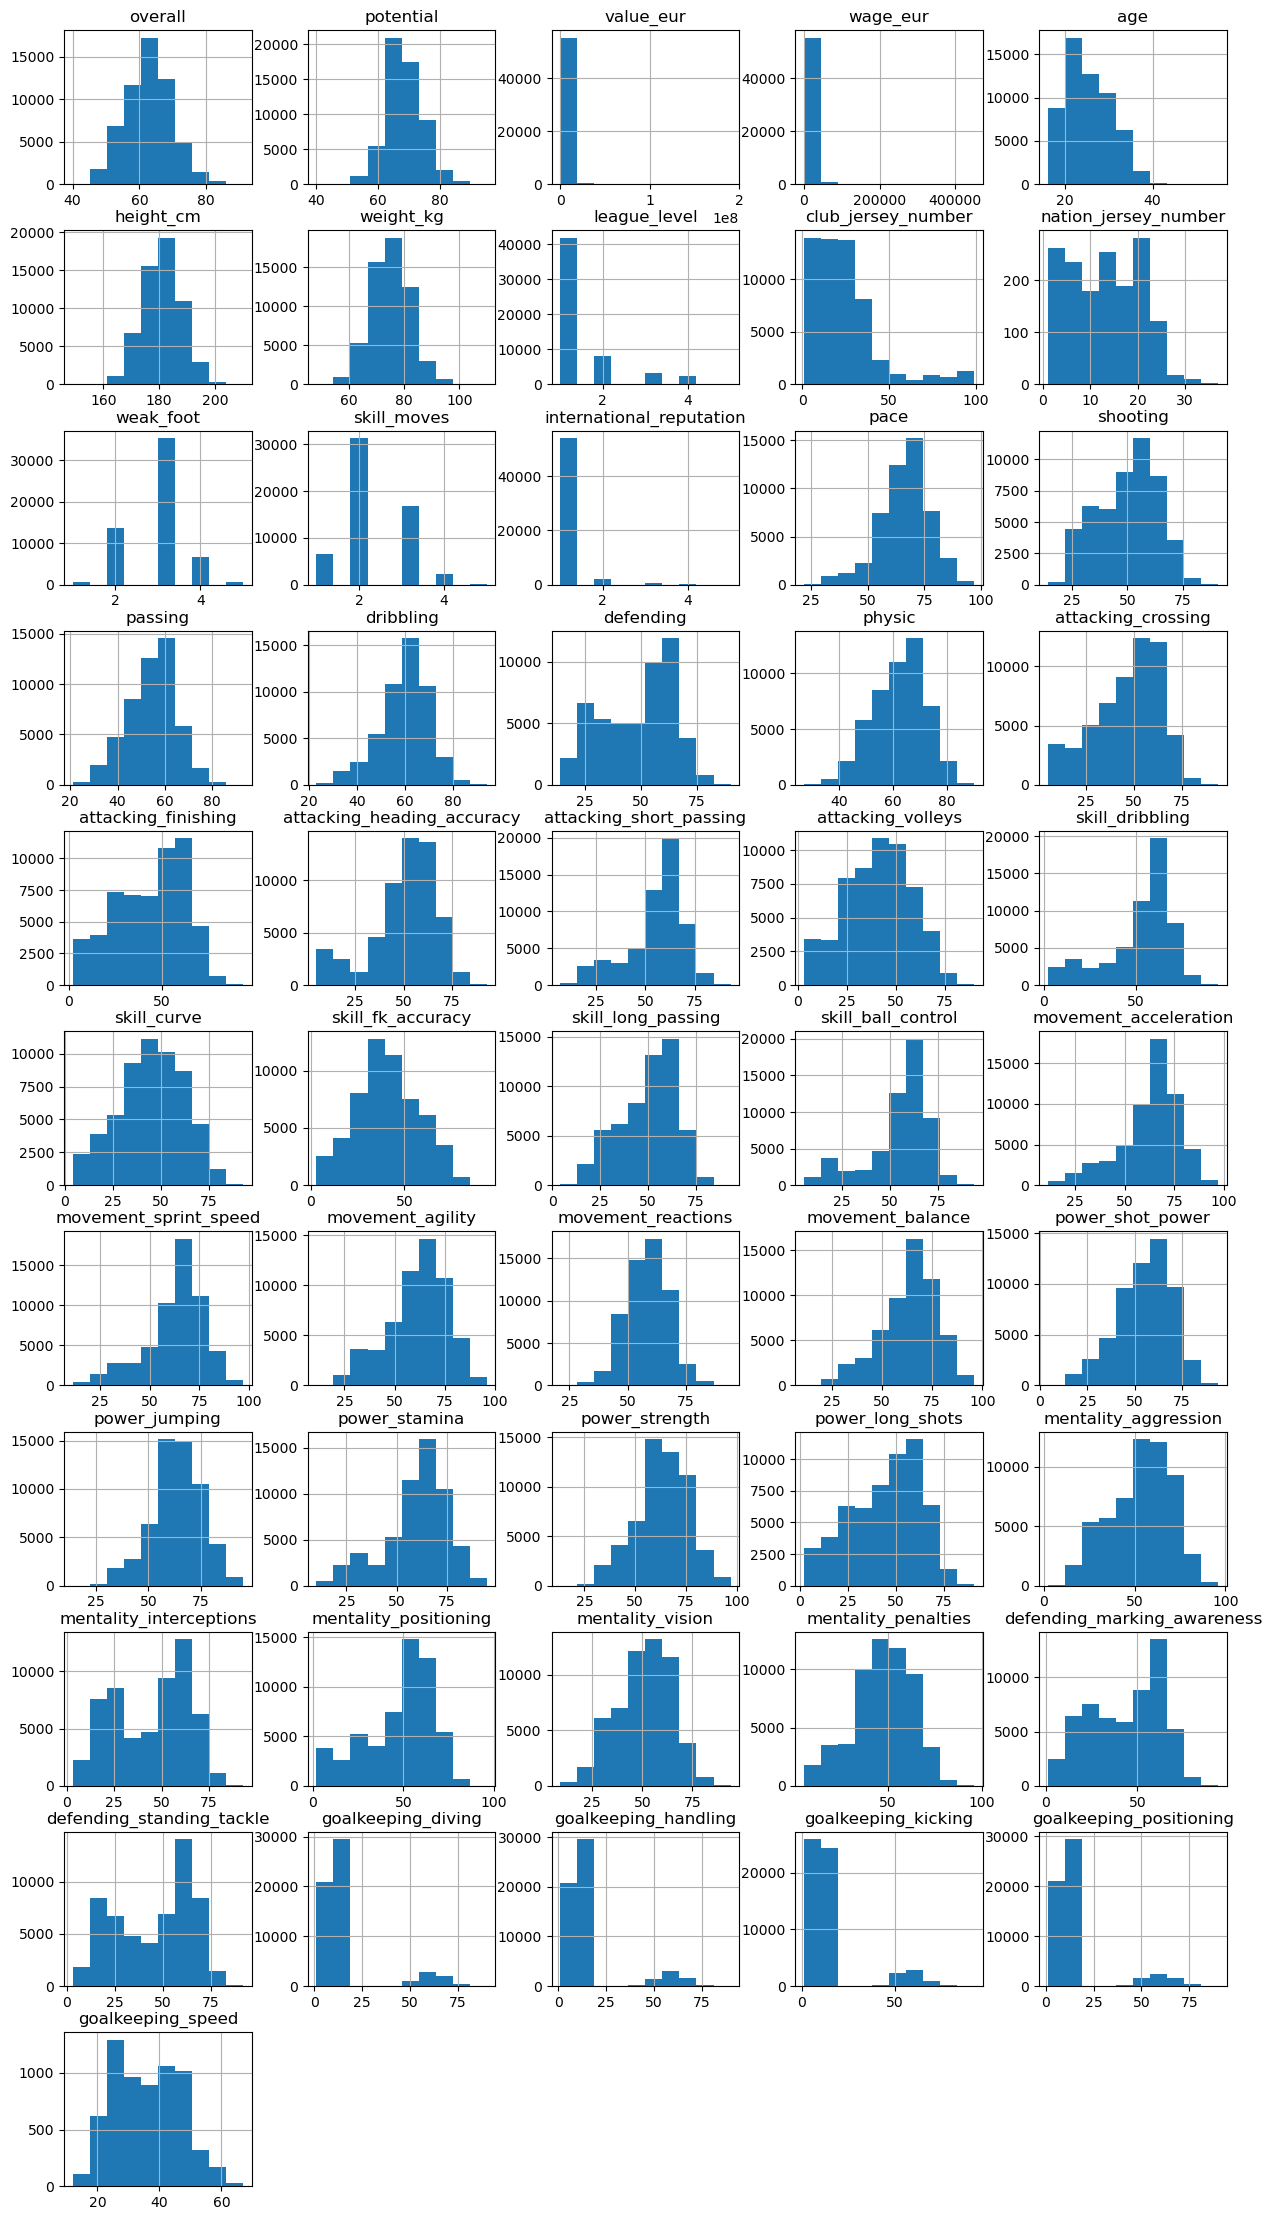

In [22]:
df_23.hist(figsize=(15,28),layout=(11,5))
plt.show()

#### Object Columns

##### 1. League Level & League ID

In [27]:
# take a look into the league_level
print(
    df_23['league_level'].unique(),
    len(df_23['league_level'].unique())
)

[ 1.  2. nan  3.  4.  5.] 6


* What is 'nan' of leagure_level?


In [34]:
df_23[df_23['league_level'].isna()][['long_name','overall']]

,long_name,overall
406,Tomáš Vaclík,80
618,Ernesto Alexis Vega Rojas,79
664,Alfredo Talavera Díaz,78
744,Luis Gerardo Chávez Magallón,78
755,Henry Josué Martín Mex,78
...,...,...
9982982,Ivan Čvorović,60
9991617,Péter Szakály,68
9994795,Petri Pasanen,64
9995343,Pál Lázár,64


In [69]:
df_23.groupby(['league_level','league_name']).count()['long_name']

league_level  league_name        
1.0           1. Division              51
              1. HNL                   84
              A-League                818
              Allsvenskan            1299
              Bundesliga             1686
              Ekstraklasa            1720
              Eliteserien            1268
              Eredivisie             1449
              Fortuna Liga            165
              J-League               1290
              Jupiler Pro League     1324
              K League 1             1433
              La Liga                1144
              Liga 1                 1012
              Liga BetPlay           1695
              Liga De Futbol Prof     463
              Liga MX                1340
              Liga Portugal          1701
              Liga Pro                465
              Liga Profesional       2464
              Ligue 1                1082
              Major League Soccer    1808
              NB I.                    35


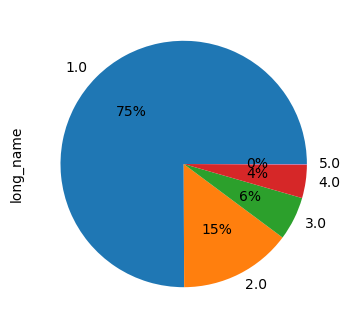

In [74]:
#Which league_level has the most players
fig,ax=plt.subplots(figsize=(12,4))
df_23.groupby(['league_level']).count()['long_name'].sort_values(ascending=0).plot.pie(autopct='%.f%%')
plt.show()

* 75% players are in league_level 1

In [40]:
df_23.groupby(['league_name']).count()

,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,...,mentality_positioning,mentality_vision,mentality_penalties,defending_marking_awareness,defending_standing_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_speed
league_name,,,,,,,,,,,,,,,,,,,,,
1. Division,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,6
1. HNL,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,10
2. Bundesliga,1089,1089,1089,1089,1088,1089,1089,1089,1089,1089,...,1089,1089,1089,1089,1089,1089,1089,1089,1089,143
3. Liga,1481,1481,1481,1481,1481,1481,1481,1481,1481,1481,...,1481,1481,1481,1481,1481,1481,1481,1481,1481,165
A-League,818,818,818,818,818,818,818,818,818,818,...,818,818,818,818,818,818,818,818,818,96
Allsvenskan,1299,1299,1299,1299,1291,1299,1299,1299,1299,1299,...,1299,1299,1299,1299,1299,1299,1299,1299,1299,158
Bundesliga,1686,1686,1686,1686,1684,1686,1686,1686,1686,1686,...,1686,1686,1686,1686,1686,1686,1686,1686,1686,192
Championship,1398,1398,1398,1398,1394,1398,1398,1398,1398,1398,...,1398,1398,1398,1398,1398,1398,1398,1398,1398,158
Ekstraklasa,1720,1720,1720,1720,1715,1720,1720,1720,1720,1720,...,1720,1720,1720,1720,1720,1720,1720,1720,1720,195


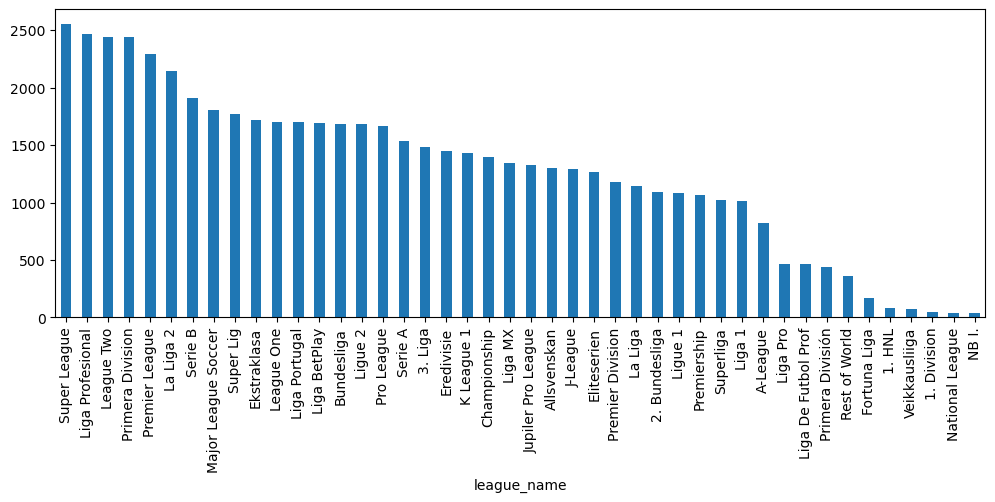

In [52]:
#Which league has the most players
fig,ax=plt.subplots(figsize=(12,4))
df_23.groupby(['league_name']).count()['long_name'].sort_values(ascending=0).plot(kind='bar')
plt.show()

In [21]:
#How many columns' dtype are Object
df_23.dtypes[df_23.dtypes=='object'].count()

40

##### 2. Start from the "player_positions"

In [22]:
#Look at the player_positions
a = 0
for i in df_23['player_positions'].unique():
    a+=1
print(a)

1110


* It's complicated as one player can have multiple positions.

##### Made a wrong judgment, but it doesn't hurt  to try

In [23]:
#Look at the club_position
df_23['club_position'].unique()

array(['RS', 'CF', 'ST', 'RCM', 'LS', 'GK', 'RW', 'SUB', 'CAM', 'RDM',
       'LCB', 'LM', 'LCM', 'LW', 'LB', 'RES', 'RCB', 'CM', 'LDM', 'CDM',
       'RF', 'RB', 'RM', 'CB', 'LWB', 'RWB', 'RAM', 'LAM', 'LF', nan],
      dtype=object)

* We only look at the position of Starting XI

In [24]:
#Remove Reservation, substitute, and nan
club_pos = df_23.loc[
    (df_23['club_position']!='RES') & 
    (df_23['club_position']!='SUB') & 
    (df_23['club_position'].notna())]

In [56]:
club_pos.groupby(['club_position'])['club_position'].count().sort_values(ascending=1)

club_position
CF       20
RAM      28
LAM      29
RF       41
LF       43
CM      109
RWB     191
LWB     199
LW      290
RW      293
CB      334
CDM     382
RDM     419
RS      422
LS      423
LDM     439
CAM     587
RM      761
LM      801
RCM     855
LCM     869
ST      934
LB      972
RB      984
GK     1189
LCB    1328
RCB    1329
Name: club_position, dtype: int64

* It seems unreal that only 20 CFs.
* We should not exclude the players who have multiple postions. We need to start it over.

##### Restart from the player_position in the "df_23", now we include all players.

* Actually, what we care about is how many players can be in one position, for example: 200 players can be CF.

In [64]:
df_23.loc[df_23['club_position'] == 'CF']

,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
1,23,9,2023-01-13,K. Benzema,Karim Benzema,"CF, ST",91,91,64000000.0,450000.0,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3
94,23,9,2023-01-13,D. Mertens,Dries Mertens,"CAM, CF",84,84,17500000.0,77000.0,...,60+3,60+3,60+3,63+3,59+3,47+3,47+3,47+3,59+3,16+3
169,23,9,2023-01-13,Rafa,Rafael Alexandre Fernandes Ferreira da Silva,"CF, RM, RW",83,83,36500000.0,26000.0,...,65+2,65+2,65+2,70+2,67+2,54+2,54+2,54+2,67+2,18+2
908,23,9,2023-01-13,H. Mukhtar,Hany Mukhtar,"CF, ST, CAM",77,78,12500000.0,11000.0,...,63+2,63+2,63+2,66+2,62+2,52+2,52+2,52+2,62+2,19+2
1384,23,9,2023-01-13,Luiz Adriano,Luiz Adriano de Souza da Silva,"ST, CF, CAM",75,75,2400000.0,21000.0,...,50+2,50+2,50+2,53+2,50+2,46+2,46+2,46+2,50+2,18+2
3102,23,9,2023-01-13,C. Akpom,Chuba Akpom,ST,72,73,2800000.0,23000.0,...,48+2,48+2,48+2,51+2,49+2,46+2,46+2,46+2,49+2,17+2
3964,23,9,2023-01-13,Adrián Burnabão,Adrián Guto Negrão Bastos,"CAM, CF",71,71,2000000.0,11000.0,...,51+2,51+2,51+2,53+2,47+2,40+2,40+2,40+2,47+2,18+2
4299,23,9,2023-01-13,J. Ménez,Jérémy Ménez,"ST, CF, LW",70,70,675000.0,2000.0,...,49+3,49+3,49+3,50+3,47+3,42+3,42+3,42+3,47+3,11+3
5045,23,9,2023-01-13,E. Cañete,Martín Ezequiel Cañete,"CM, ST, CAM",70,77,3200000.0,7000.0,...,62+2,62+2,62+2,61+2,59+2,56+2,56+2,56+2,59+2,15+2
5127,23,9,2023-01-13,F. Fagúndez,Franco Fagúndez,"CAM, ST, CF",70,81,3600000.0,500.0,...,48+2,48+2,48+2,51+2,48+2,41+2,41+2,41+2,48+2,17+2
